In [77]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model


# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


#TL pecific modules
from keras.applications.vgg16 import VGG16

ModuleNotFoundError: No module named 'cv2'

In [78]:
df_movies = pd.read_csv('/Users/ramozo_88/DSI/repos/recommender-case-study/data/movies/movies.csv')
df_ratings = pd.read_csv('/Users/ramozo_88/DSI/repos/recommender-case-study/data/movies/ratings.csv')
df_links = pd.read_csv('/Users/ramozo_88/DSI/repos/recommender-case-study/data/movies/links.csv')
df_tags = pd.read_csv('/Users/ramozo_88/DSI/repos/recommender-case-study/data/movies/tags.csv')

df = pd.merge(df_movies, df_ratings)

 #pre-processing
 #dropping colums that aren't needed
#df.drop(df.columns[[3,4,7]], axis=1, inplace=True)
#ratings.drop( "unix_timestamp", inplace = True, axis = 1 ) 
#movies.drop(movies.columns[[3,4]], inplace = True, axis = 1 )


#Pivot Table(This creates a matrix of users and movie_ratings)
#ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
#ratings_matrix.fillna( 0, inplace = True )

In [79]:
df[df.userId==11]

,movieId,title,genres,userId,rating,timestamp
2646,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,11,5.0,1391658537
3163,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,11,1.0,1391656827
4268,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy,11,4.0,1391657561
5478,169,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama,11,3.0,1391657297
8679,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,11,5.0,1391658423
20798,778,Trainspotting (1996),Comedy|Crime|Drama,11,4.5,1391658505
21261,785,Kingpin (1996),Comedy,11,3.5,1391656845
23526,923,Citizen Kane (1941),Drama|Mystery,11,5.0,1391658556
24883,1027,Robin Hood: Prince of Thieves (1991),Adventure|Drama,11,4.5,1391658634
29112,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western,11,5.0,1391658440


In [34]:
df_tags

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765
5,15,35957,short,1141391873
6,15,37729,dull story,1141391806
7,15,45950,powerpoint,1169616291
8,15,100365,activist,1425876220
9,15,100365,documentary,1425876220


In [48]:
df.drop(df.columns[[1,2,5]], axis=1, inplace=True)

In [49]:
df

,movieId,userId,rating
0,1,7,3.0
1,1,9,4.0
2,1,13,5.0
3,1,15,2.0
4,1,19,3.0
5,1,20,3.5
6,1,23,3.0
7,1,26,5.0
8,1,30,4.0
9,1,37,4.0


In [60]:
ratings_matrix = df.pivot_table(index=['userId'],columns=['movieId'],values='rating').reset_index(drop=True)

In [61]:
ratings_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
users = df.userId.unique()
movies = df.movieId.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}


In [64]:
df['userId'] = df['userId'].apply(lambda x: userid2idx[x])
df['movieId'] = df['movieId'].apply(lambda x: movieid2idx[x])
split = np.random.rand(len(df)) < 0.8
train = df[split]
valid = df[~split]
print(train.shape , valid.shape)

(79941, 3) (20063, 3)


In [65]:
n_movies=len(df['movieId'].unique())
n_users=len(df['userId'].unique())
n_latent_factors=64  

In [94]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec =Flatten(name='FlattenUsers')(user_embedding)
movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
sim=dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1, normalize=False)
model =keras.models.Model([user_input, movie_input],sim)

In [95]:
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

In [96]:
train.shape
batch_size=128
epochs=50


In [97]:
History = model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1)

Train on 79941 samples, validate on 20063 samples
Epoch 1/50
79941/79941 [==============================] - 4s 45us/step - loss: 13.6936 - val_loss: 13.6091
Epoch 2/50
79941/79941 [==============================] - 3s 42us/step - loss: 13.6845 - val_loss: 13.6051
Epoch 3/50
79941/79941 [==============================] - 3s 43us/step - loss: 13.6654 - val_loss: 13.5845
Epoch 4/50
79941/79941 [==============================] - 3s 42us/step - loss: 13.6100 - val_loss: 13.5044
Epoch 5/50
79941/79941 [==============================] - 3s 42us/step - loss: 13.4490 - val_loss: 13.2720
Epoch 6/50
79941/79941 [==============================] - 3s 42us/step - loss: 13.0755 - val_loss: 12.7831
Epoch 7/50
79941/79941 [==============================] - 3s 42us/step - loss: 12.4120 - val_loss: 12.0008
Epoch 8/50
79941/79941 [==============================] - 3s 44us/step - loss: 11.4654 - val_loss: 10.9714
Epoch 9/50
79941/79941 [==============================] - 3s 41us/step - loss: 10.3107 - val_l

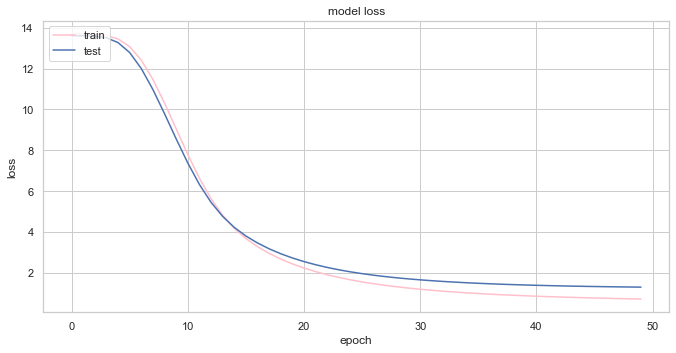

In [98]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'pink')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [85]:
n_latent_factors=50
n_movies=len(df['movieId'].unique())
n_users=len(df['userId'].unique())


In [86]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)

In [87]:
movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
movie_vec=Dropout(0.40)(movie_vec)

In [88]:
sim=dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)


In [89]:
nn_inp=Dense(96,activation='relu')(sim)
nn_inp=Dropout(0.4)(nn_inp)
# nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(1,activation='relu')(nn_inp)
nn_model =keras.models.Model([user_input, movie_input],nn_inp)
nn_model.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
movie_input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        33550       user_input[0][0]                 
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        453300      movie_input[0][0]                
____________________________________________________________________________________________

In [90]:
nn_model.compile(optimizer=Adam(lr=1e-3),loss='mse')

In [91]:
batch_size=128
epochs=20

In [92]:
History = nn_model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1)

Train on 79941 samples, validate on 20063 samples
Epoch 1/20
79941/79941 [==============================] - 4s 52us/step - loss: 2.8962 - val_loss: 1.1344
Epoch 2/20
79941/79941 [==============================] - 4s 46us/step - loss: 1.2309 - val_loss: 1.0310
Epoch 3/20
79941/79941 [==============================] - 4s 46us/step - loss: 0.9996 - val_loss: 0.9396
Epoch 4/20
79941/79941 [==============================] - 4s 46us/step - loss: 0.8468 - val_loss: 0.9078
Epoch 5/20
79941/79941 [==============================] - 4s 49us/step - loss: 0.7730 - val_loss: 0.8987
Epoch 6/20
79941/79941 [==============================] - 4s 46us/step - loss: 0.7152 - val_loss: 0.8879
Epoch 7/20
79941/79941 [==============================] - 4s 46us/step - loss: 0.6688 - val_loss: 0.8775
Epoch 8/20
79941/79941 [==============================] - 4s 44us/step - loss: 0.6379 - val_loss: 0.8706
Epoch 9/20
79941/79941 [==============================] - 4s 46us/step - loss: 0.6085 - val_loss: 0.8698
Epoch

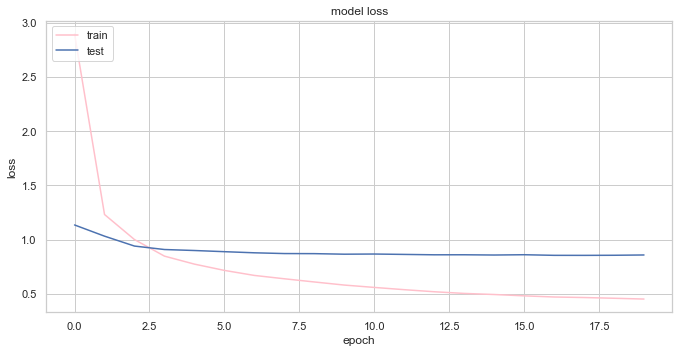

In [93]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'pink')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [99]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20,3.5,1238729767
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,3.0,1148729853
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,26,5.0,1360087980
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,4.0,944943070
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,37,4.0,981308121


In [127]:
df


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,19,3.0,855190091
5,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,20,3.5,1238729767
6,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,23,3.0,1148729853
7,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,26,5.0,1360087980
8,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,30,4.0,944943070
9,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,37,4.0,981308121


In [104]:
full_data = df.drop_duplicates('movieId')


In [108]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [118]:
genre_list = ['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [123]:
df_dummies = pd.get_dummies(df['genres'],drop_first=True)

In [126]:
movie_stats = df.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                                          size      mean
title                                                   
"Great Performances" Cats (1998)           2.0  1.750000
$9.99 (2008)                               3.0  3.833333
'Hellboy': The Seeds of Creation (2004)    1.0  2.000000
'Neath the Arizona Skies (1934)            1.0  0.500000
'Round Midnight (1986)                     2.0  2.250000

In [130]:
min_50 = movie_stats['rating']['size'] >= 50
movie_stats[min_50].sort_values([('rating', 'mean')], ascending=False).head(25)


rating          
                                                     size      mean
title                                                              
Godfather, The (1972)                               200.0  4.487500
Shawshank Redemption, The (1994)                    311.0  4.487138
African Queen, The (1951)                            50.0  4.420000
Maltese Falcon, The (1941)                           62.0  4.387097
Godfather: Part II, The (1974)                      135.0  4.385185
Usual Suspects, The (1995)                          201.0  4.370647
Raging Bull (1980)                                   50.0  4.350000
Chinatown (1974)                                     76.0  4.335526
Rear Window (1954)                                   92.0  4.315217
12 Angry Men (1957)                                  74.0  4.304054
Schindler's List (1993)                             244.0  4.303279
City of God (Cidade de Deus) (2002)                  69.0  4.297101
Seven Samurai (Shichinin no samurai) (1954)          54.0  4.277778
North by Northwest (1959)                            87.0  4.270115
One Flew Over the Cuckoo's Nest (1975)              144.0  4.256944
Fargo (1996)                                        224.0  4.256696
Pulp Fiction (1994)                                 324.0  4.256173
Psycho (1960)                                        77.0  4.253247
American Beauty (1999)                              220.0  4.236364
Dark Knight, The (2008)                             121.0  4.235537
Casablanca (1942)                                   117.0  4.235043
Star Wars: Episode V - The Empire Strikes Back ...  234.0  4.232906
Memento (2000)                                      132.0  4.227273
Vertigo (1958)                                       69.0  4.224638
Taxi Driver (1976)                                  118.0  4.224576

In [131]:
movie_stats[min_50].sort_values([('rating', 'size')], ascending=False).head(25)


rating          
                                                     size      mean
title                                                              
Forrest Gump (1994)                                 341.0  4.054252
Pulp Fiction (1994)                                 324.0  4.256173
Shawshank Redemption, The (1994)                    311.0  4.487138
Silence of the Lambs, The (1991)                    304.0  4.138158
Star Wars: Episode IV - A New Hope (1977)           291.0  4.221649
Jurassic Park (1993)                                274.0  3.706204
Matrix, The (1999)                                  259.0  4.183398
Toy Story (1995)                                    247.0  3.872470
Schindler's List (1993)                             244.0  4.303279
Terminator 2: Judgment Day (1991)                   237.0  4.006329
Star Wars: Episode V - The Empire Strikes Back ...  234.0  4.232906
Braveheart (1995)                                   228.0  3.945175
Back to the Future (1985)                           226.0  4.015487
Fargo (1996)                                        224.0  4.256696
American Beauty (1999)                              220.0  4.236364
Raiders of the Lost Ark (Indiana Jones and the ...  220.0  4.193182
Independence Day (a.k.a. ID4) (1996)                218.0  3.483945
Star Wars: Episode VI - Return of the Jedi (1983)   217.0  4.059908
Aladdin (1992)                                      215.0  3.674419
Fugitive, The (1993)                                213.0  3.953052
Fight Club (1999)                                   202.0  4.178218
Dances with Wolves (1990)                           202.0  3.717822
Usual Suspects, The (1995)                          201.0  4.370647
Seven (a.k.a. Se7en) (1995)                         201.0  4.034826
Godfather, The (1972)                               200.0  4.487500

Text(0.5, 0, 'Rating (Out of 5)')

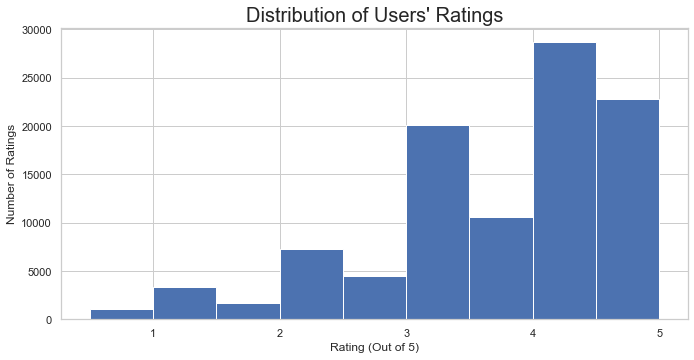

In [148]:
ratings.rating.plot.hist(bins=9)
plt.title("Distribution of Users' Ratings", fontsize=20)
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)')
plt.savefig()

In [136]:
ratings_user_summary = ratings.groupby('userId')['rating'].agg(['count', 'mean', 'std'])
ratings_user_summary.head(10)

,count,mean,std
userId,,,
1,20,2.550000,0.887041
2,76,3.486842,0.901753
3,51,3.568627,0.741752
4,204,4.348039,0.947616
5,100,3.910000,0.565775
6,44,3.261364,1.241195
7,88,3.465909,0.934017
8,116,3.866379,0.794978
9,45,3.755556,0.883062


Text(0.5, 0, 'Sorted Users')

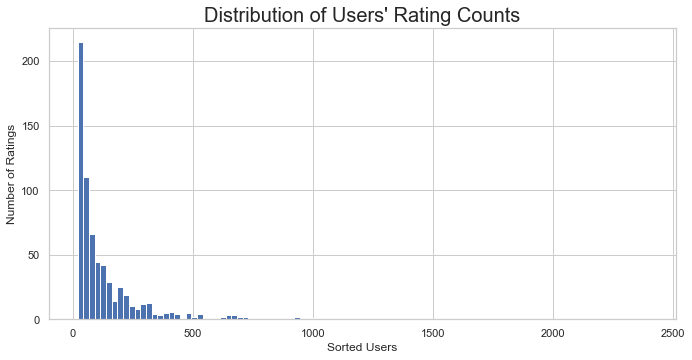

In [147]:
ratings_user_summary.sort_values(by='count')['count'].hist(bins=100)
plt.title("Distribution of Users' Rating Counts", fontsize=20)
plt.ylabel('Number of Ratings')
plt.xlabel('Sorted Users')
plt.savefig()

Text(0.5, 0, 'Rating')

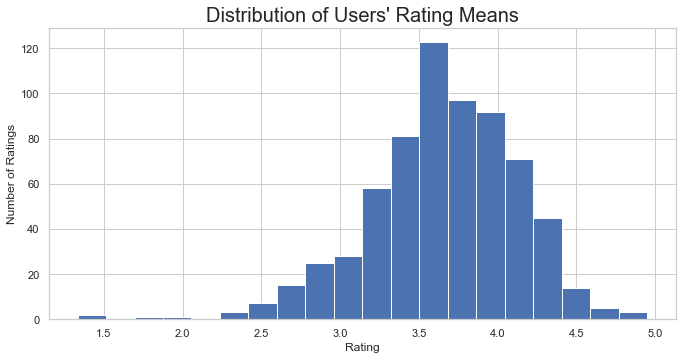

In [150]:
ratings_user_summary.sort_values(by='mean')['mean'].hist(bins=20)
plt.title("Distribution of Users' Rating Means", fontsize=20)
plt.ylabel('Number of Ratings')
plt.xlabel('Rating')